NEW FILE FOR THE CAR SALES

-------------------------------------------------------------------

This is a supervised learning problem. We have the output of each observation and we are going to predict this output and come up with the best estimations possible for each observation.

In [244]:
#Get path (independently from who is running the command)

import os
os.getcwd()

'c:\\Users\\Jaume\\Documents\\MDDB\\AI\\AI_Group11_Project\\AI_Group7_Assignment'

In [245]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import PredefinedSplit, GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, recall_score, precision_score, precision_recall_curve
import matplotlib.pyplot as plt
from plotnine import *
import os
import datetime
import pickle
import json

**PHASE 0: READ AND CLEAN DATA**

In [246]:
os.listdir(os.path.join('..', 'car_prices')) # independent of the platform (unix, windows)

## We read the files
car_sales_data_path = os.path.join("..", "car_prices", "car_prices.csv")
df = pd.read_csv(car_sales_data_path, on_bad_lines= "skip")

In [ ]:
df

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,sellingprice
0,2015,Kia,Sorento,LX,SUV,automatic,ca,5.0,16639.0,white,black,21500
1,2015,Kia,Sorento,LX,SUV,automatic,ca,5.0,9393.0,white,beige,21500
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,ca,4.5,1331.0,gray,black,30000
3,2015,Volvo,S60,T5,Sedan,automatic,ca,4.1,14282.0,white,black,27750
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,ca,4.3,2641.0,gray,black,67000
...,...,...,...,...,...,...,...,...,...,...,...,...
558805,2011,BMW,5 Series,528i,Sedan,automatic,fl,3.9,66403.0,white,brown,22800
558807,2012,Ram,2500,Power Wagon,Crew Cab,automatic,wa,5.0,54393.0,white,black,30800
558808,2012,BMW,X5,xDrive35d,SUV,automatic,ca,4.8,50561.0,black,black,34000
558809,2015,Nissan,Altima,2.5 S,sedan,automatic,ga,3.8,16658.0,white,black,11100


In [ ]:
# We are going to check if there are NaN values

# Count NaN values in each column
nan_counts = df.isna().sum()

# Display the count of NaN values
print("\nCount of NaN values in each column:")
print(nan_counts)

#We drop the NaN values

df = df.dropna()

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\Jaume\anaconda3\envs\AI_environment\Lib\site-packages\IPython\core\interactiveshell.py", line 3526, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Jaume\AppData\Local\Temp\ipykernel_3840\3053684192.py", line 4, in <module>
    nan_counts = df.isna().sum()
                 ^^^^^^^^^
  File "c:\Users\Jaume\anaconda3\envs\AI_environment\Lib\site-packages\pandas\core\frame.py", line 6238, in isna
    res_mgr = self._mgr.isna(func=isna)
              ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Jaume\anaconda3\envs\AI_environment\Lib\site-packages\pandas\core\internals\base.py", line 165, in isna
    return self.apply("apply", func=func)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Jaume\anaconda3\envs\AI_environment\Lib\site-packages\pandas\core\internals\managers.py", line 354, in apply
    applied = getattr(b, f)(**kwargs)
              ^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Jaume\anacon

In [ ]:
df

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,sellingprice
0,2015,Kia,Sorento,LX,SUV,automatic,ca,5.0,16639.0,white,black,21500
1,2015,Kia,Sorento,LX,SUV,automatic,ca,5.0,9393.0,white,beige,21500
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,ca,4.5,1331.0,gray,black,30000
3,2015,Volvo,S60,T5,Sedan,automatic,ca,4.1,14282.0,white,black,27750
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,ca,4.3,2641.0,gray,black,67000
...,...,...,...,...,...,...,...,...,...,...,...,...
558805,2011,BMW,5 Series,528i,Sedan,automatic,fl,3.9,66403.0,white,brown,22800
558807,2012,Ram,2500,Power Wagon,Crew Cab,automatic,wa,5.0,54393.0,white,black,30800
558808,2012,BMW,X5,xDrive35d,SUV,automatic,ca,4.8,50561.0,black,black,34000
558809,2015,Nissan,Altima,2.5 S,sedan,automatic,ga,3.8,16658.0,white,black,11100


**PHASE 1: DESCRIPTIVE ANALYSIS**

In [ ]:
df.info()

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\Jaume\anaconda3\envs\AI_environment\Lib\site-packages\IPython\core\interactiveshell.py", line 3526, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Jaume\AppData\Local\Temp\ipykernel_3840\3771845804.py", line 1, in <module>
    df.info()
  File "c:\Users\Jaume\anaconda3\envs\AI_environment\Lib\site-packages\pandas\core\frame.py", line 3464, in info
    info.render(
  File "c:\Users\Jaume\anaconda3\envs\AI_environment\Lib\site-packages\pandas\io\formats\info.py", line 512, in render
    printer.to_buffer(buf)
  File "c:\Users\Jaume\anaconda3\envs\AI_environment\Lib\site-packages\pandas\io\formats\info.py", line 582, in to_buffer
    table_builder = self._create_table_builder()
                    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Jaume\anaconda3\envs\AI_environment\Lib\site-packages\pandas\io\formats\info.py", line 667, in _create_table_builder
    return DataFrameTableBuilderVerbose(
    

In [ ]:
df.isnull().sum().sort_values(ascending = False)


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\Jaume\anaconda3\envs\AI_environment\Lib\site-packages\IPython\core\interactiveshell.py", line 3526, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Jaume\AppData\Local\Temp\ipykernel_3840\828367327.py", line 1, in <module>
    df.isnull().sum().sort_values(ascending = False)
    ^^^^^^^^^^^
  File "c:\Users\Jaume\anaconda3\envs\AI_environment\Lib\site-packages\pandas\core\frame.py", line 6247, in isnull
    return self.isna()
           ^^^^^^^^^^^
  File "c:\Users\Jaume\anaconda3\envs\AI_environment\Lib\site-packages\pandas\core\frame.py", line 6238, in isna
    res_mgr = self._mgr.isna(func=isna)
              ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Jaume\anaconda3\envs\AI_environment\Lib\site-packages\pandas\core\internals\base.py", line 165, in isna
    return self.apply("apply", func=func)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Jaume\anaconda3\envs\AI_environment\Lib\site-

In [ ]:
numbers = ['year', 'condition', 'odometer', 'mmr', 'sellingprice']
categories = ['make', 'model', 'trim', 'body', 'transmission', 'vin', 'state', 'color', 'interior', 'seller', 'saledate']

In [ ]:
df[numbers].describe()

KeyError: "['mmr'] not in index"

Key observations:

1. **Year, Condition, Odometer:**
   - No issues with the minimum and maximum values.
   - All values in these columns make sense and fall within reasonable ranges.

2. **Year, Condition, Odometer, MMR, Selling Price:**
   - There is a difference between the mean and median for Year, Condition, Odometer, MMR, and Selling Price.
   - This difference could indicate the presence of outliers in the data, skewing the mean away from the median.
   - Outliers can significantly impact statistical measures, so it's important to investigate and possibly handle them during data preprocessing.

3. **MMR Column:**
   - The minimum range value in the MMR column is quite far from the mean and median.
   - Further review during preprocessing is needed to understand the nature of these extreme values.
   - Outliers in MMR may be indicative of rare cases or errors in the data and might need special treatment (e.g., removal or transformation).

4. **Anomaly in Minimum Selling Price:**
   - There is an anomaly in the minimum selling price value, suspected to be unknown data.
   - The data is imputed with a value of 1, or it might represent instances where the car is sold as part of a company program (gift).
   - Imputation of missing or unknown values is a common preprocessing step, and using a value of 1 might be reasonable if it indicates a placeholder or default value.

**PHASE 2: DATA MODELLING**

In [ ]:
# Create function to check percentage of missing values
def check_missing_value():
    missing_value_percentage = (df.isnull().sum().sum()/df.shape[0]) * 100
    print(f"Total missing values {round(missing_value_percentage,2)}%")

check_missing_value()

Total missing values 0.0%


In [ ]:
#We drop columns that we are not going to use

df.drop('mmr', axis=1, inplace=True)
df.drop('vin', axis=1, inplace=True)
df.drop('seller', axis=1, inplace=True)
df.drop('saledate', axis=1, inplace=True)

C:\Users\Jaume\AppData\Local\Temp\ipykernel_3840\2656904286.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Jaume\AppData\Local\Temp\ipykernel_3840\2656904286.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Jaume\AppData\Local\Temp\ipykernel_3840\2656904286.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Jaume\AppData\Local\Temp\ipykernel_3840\2656904286.py:6: SettingWithCopyWarning: 
A value is trying 

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

def train_val_test():
    
    # Define the size for each set
    train_size = 0.64
    validation_size = 0.16
    test_size = 0.20

    # Split the data into training and temp sets
    train_data, temp_data = train_test_split(df, test_size=(1 - train_size), random_state=42)

    # Split the temp set into validation and test sets
    validation_data, test_data = train_test_split(temp_data, test_size=(validation_size / (validation_size + test_size)), random_state=42)

    # Print the sizes of the sets
    print(f"Train set size: {len(train_data)}")
    print(f"Validation set size: {len(validation_data)}")
    print(f"Test set size: {len(test_data)}")

    # Now you can use train_data, validation_data, and test_data for your training, validation, and testing purposes

    return train_data, validation_data, test_data

train_data, validation_data, test_data = train_val_test()

# Count NaN values in each column
nan_counts = train_data.isna().sum()

# Display the count of NaN values
print("\nCount of NaN values in each column:")
print(nan_counts)


Train set size: 302295
Validation set size: 94467
Test set size: 75574

Count of NaN values in each column:
year            0
make            0
model           0
trim            0
body            0
transmission    0
state           0
condition       0
odometer        0
color           0
interior        0
sellingprice    0
dtype: int64


In [ ]:
import pandas as pd

# Count unique values in each column
unique_counts = train_data.nunique()

# Print the result
print(unique_counts)


year                26
make                53
model              751
trim              1439
body                83
transmission         2
state               34
condition           41
odometer        135422
color               20
interior            17
sellingprice      1591
dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd
from sklearn.preprocessing import OneHotEncoder


#We standarize the columns wih more than two values through an ordinal scaler

def standarize_Data_Big_Columns (df):

    # Columns to encode
    columns_to_encode = ['make', 'model', 'trim', 'body', 'color', 'interior', 'state']

    # Initialize OrdinalEncoder
    encoder = OrdinalEncoder()

    # Fit and transform the specified columns 
    df[columns_to_encode] = encoder.fit_transform(df[columns_to_encode])

    return df


train_data = standarize_Data_Big_Columns(train_data)



In [ ]:
train_data = train_data.reset_index(drop=True)


In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd
from sklearn.preprocessing import OneHotEncoder


# We will now standarize the categorical columns so we can use them as features in out model

def standarize_Data_Transmission (df):

    # We extract the column to be encoded
    transmission_column = df[['transmission']]

    # Initialize the OneHotEncoder
    encoder = OneHotEncoder(sparse=False, drop='first')  # Use drop='first' to avoid the dummy variable trap

    # We fit and transform the data
    encoded_data = encoder.fit_transform(transmission_column)

    # Creation of a DataFrame with the encoded data and column names
    encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['transmission']))

    # We append the two dataframes horizontally
    dataframes = [df, encoded_df]
    df = pd.concat(dataframes, axis=1, ignore_index=False)

    return df

train_data = standarize_Data_Transmission(train_data)



c:\Users\Jaume\anaconda3\envs\AI_environment\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.


In [ ]:
# We check that the values have been concatenated properly
train_data

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,sellingprice,transmission_manual
0,2011,36.0,654.0,881.0,11.0,automatic,22.0,4.2,63661.0,1.0,6.0,21800,0.0
1,2004,50.0,459.0,636.0,24.0,automatic,11.0,2.8,175370.0,2.0,1.0,1900,0.0
2,2012,11.0,26.0,1134.0,24.0,manual,25.0,3.6,24030.0,8.0,3.0,9100,1.0
3,2013,50.0,653.0,995.0,34.0,automatic,4.0,4.3,24981.0,2.0,13.0,20800,0.0
4,2012,18.0,52.0,797.0,35.0,automatic,25.0,3.2,33494.0,7.0,6.0,13000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
302290,2012,36.0,60.0,99.0,35.0,automatic,18.0,4.6,32885.0,17.0,1.0,12500,0.0
302291,2006,14.0,253.0,807.0,11.0,automatic,13.0,1.9,187302.0,19.0,6.0,8000,0.0
302292,2013,20.0,282.0,604.0,19.0,automatic,9.0,4.1,39710.0,17.0,1.0,20000,0.0
302293,2006,14.0,277.0,1020.0,35.0,automatic,16.0,2.5,163172.0,0.0,1.0,2500,0.0


In [ ]:
# We drop the transmission column that we are not going to use anymore
train_data.drop('transmission', axis=1, inplace=True)

train_data

,year,make,model,trim,body,state,condition,odometer,color,interior,sellingprice,transmission_manual
0,2011,36.0,654.0,881.0,11.0,22.0,4.2,63661.0,1.0,6.0,21800,0.0
1,2004,50.0,459.0,636.0,24.0,11.0,2.8,175370.0,2.0,1.0,1900,0.0
2,2012,11.0,26.0,1134.0,24.0,25.0,3.6,24030.0,8.0,3.0,9100,1.0
3,2013,50.0,653.0,995.0,34.0,4.0,4.3,24981.0,2.0,13.0,20800,0.0
4,2012,18.0,52.0,797.0,35.0,25.0,3.2,33494.0,7.0,6.0,13000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
302290,2012,36.0,60.0,99.0,35.0,18.0,4.6,32885.0,17.0,1.0,12500,0.0
302291,2006,14.0,253.0,807.0,11.0,13.0,1.9,187302.0,19.0,6.0,8000,0.0
302292,2013,20.0,282.0,604.0,19.0,9.0,4.1,39710.0,17.0,1.0,20000,0.0
302293,2006,14.0,277.0,1020.0,35.0,16.0,2.5,163172.0,0.0,1.0,2500,0.0


In [ ]:
# We do the same for the Validation data than for the train_data

validation_data = standarize_Data_Big_Columns(validation_data)

validation_data = validation_data.reset_index(drop=True)

validation_data = standarize_Data_Transmission(validation_data)

# We drop the transmission column that we are not going to use anymore
validation_data.drop('transmission', axis=1, inplace=True)

c:\Users\Jaume\anaconda3\envs\AI_environment\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.


In [ ]:
validation_data

,year,make,model,trim,body,state,condition,odometer,color,interior,sellingprice,transmission_manual
0,2012,10.0,297.0,984.0,25.0,25.0,3.8,106108.0,17.0,6.0,7200,0.0
1,2014,48.0,122.0,882.0,69.0,14.0,3.8,31107.0,15.0,1.0,14900,0.0
2,2012,48.0,395.0,848.0,58.0,10.0,3.3,87137.0,1.0,6.0,9750,0.0
3,2014,35.0,54.0,82.0,69.0,5.0,4.2,28149.0,1.0,1.0,14000,0.0
4,2012,14.0,228.0,1181.0,70.0,12.0,4.4,37122.0,1.0,6.0,24400,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
94462,2011,32.0,90.0,355.0,33.0,5.0,3.2,48045.0,17.0,1.0,18250,0.0
94463,2014,24.0,433.0,694.0,69.0,33.0,4.1,17952.0,7.0,1.0,13800,0.0
94464,2014,48.0,556.0,658.0,25.0,2.0,2.0,22602.0,17.0,6.0,19500,0.0
94465,2010,7.0,141.0,679.0,33.0,2.0,1.9,105707.0,8.0,6.0,3300,0.0


In [ ]:
train_data

,year,make,model,trim,body,state,condition,odometer,color,interior,sellingprice,transmission_manual
0,2011,36.0,654.0,881.0,11.0,22.0,4.2,63661.0,1.0,6.0,21800,0.0
1,2004,50.0,459.0,636.0,24.0,11.0,2.8,175370.0,2.0,1.0,1900,0.0
2,2012,11.0,26.0,1134.0,24.0,25.0,3.6,24030.0,8.0,3.0,9100,1.0
3,2013,50.0,653.0,995.0,34.0,4.0,4.3,24981.0,2.0,13.0,20800,0.0
4,2012,18.0,52.0,797.0,35.0,25.0,3.2,33494.0,7.0,6.0,13000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
302290,2012,36.0,60.0,99.0,35.0,18.0,4.6,32885.0,17.0,1.0,12500,0.0
302291,2006,14.0,253.0,807.0,11.0,13.0,1.9,187302.0,19.0,6.0,8000,0.0
302292,2013,20.0,282.0,604.0,19.0,9.0,4.1,39710.0,17.0,1.0,20000,0.0
302293,2006,14.0,277.0,1020.0,35.0,16.0,2.5,163172.0,0.0,1.0,2500,0.0


In [ ]:
# We do the same for the test data

test_data = standarize_Data_Big_Columns(test_data)

test_data = test_data.reset_index(drop=True)

test_data = standarize_Data_Transmission(test_data)

# We drop the transmission column that we are not going to use anymore
test_data.drop('transmission', axis=1, inplace=True)

c:\Users\Jaume\anaconda3\envs\AI_environment\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.


In [ ]:
test_data

,year,make,model,trim,body,state,condition,odometer,color,interior,sellingprice,transmission_manual
0,1998,44.0,115.0,627.0,31.0,25.0,1.9,202621.0,0.0,0.0,1000,0.0
1,2007,8.0,55.0,686.0,30.0,5.0,2.4,120971.0,1.0,6.0,8900,0.0
2,2013,9.0,64.0,941.0,31.0,33.0,2.5,42610.0,2.0,13.0,10400,0.0
3,2013,26.0,146.0,806.0,20.0,2.0,4.2,30392.0,14.0,1.0,15750,0.0
4,2007,12.0,210.0,1122.0,30.0,4.0,3.5,61970.0,7.0,6.0,7100,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
75569,2014,22.0,566.0,2.0,74.0,33.0,4.2,23822.0,15.0,1.0,13000,0.0
75570,2007,22.0,496.0,662.0,37.0,24.0,2.6,96336.0,14.0,0.0,1900,0.0
75571,2014,36.0,33.0,393.0,8.0,2.0,4.1,9581.0,14.0,1.0,71000,0.0
75572,2001,44.0,612.0,909.0,39.0,2.0,1.9,178653.0,1.0,13.0,3600,0.0


We are now going to build the ANN model.

we used Ricardo's tutorial code 

In [ ]:
#We import the modules needed to build the ANN

import tensorflow
import keras

In [ ]:
# import what we need from keras

from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# We standarize the data with a Standard Scaler 

def observedColumn (df):
    return df[['sellingprice']]

def featureColumns (df):
    return df[['year', 'make', 'model', 'trim', 'body', 'state', 'condition', 'odometer', 'color', 'interior', 'transmission_manual']]

# Separate features (X) and target variable (y) of the train data
X_train = featureColumns(train_data) # Features
Y_train = observedColumn(train_data) # Target variable

# Separate features (X) and target variable (y) of the validation data
X_validation = featureColumns(validation_data) # Features
Y_validation = observedColumn(validation_data) # Target variable

X_train_validation = pd.concat([X_train, X_validation])
Y_train_validation = pd.concat([Y_train, Y_validation])

X_test = featureColumns(test_data)
Y_test = observedColumn(test_data)


In [ ]:
print(f"The number of neurons for the input layer must be: {X_train.shape[1]}")

The number of neurons for the input layer must be: 11


In [ ]:
# Separate features (X) and target variable (y) of the validation data

# Standardize the features (optional but often recommended)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

# Standardize the features (optional but often recommended)
scaler = StandardScaler()
X_validation = scaler.fit_transform(X_validation)

# Standardize the features (optional but often recommended)
scaler = StandardScaler()
X_test = scaler.fit_transform(X_test)

print(X_train.shape)
print(Y_train.shape)
print(X_validation.shape)
print(Y_validation.shape)
print(X_test.shape)
print(Y_test.shape)

(302295, 11)
(302295, 1)
(94467, 11)
(94467, 1)
(75574, 11)
(75574, 1)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense

# define the neural network model class instance
simple_nn = Sequential()

# add the first input layer with 11 nodes and the first hidden layer, with  relu activation function
# note that the first command does two things: create a first input layer with 11 nodes, and then a hidden layer
# we set the number of neurons to be equal to the (# of nodes in the input layer + # neurons in the output layer)/2,
# i.e. the mean of the number of neurons in the input layer and the output layer. This is usually a good heuristic to get started.
simple_nn.add(Dense(6, input_dim=X_train.shape[1], activation='relu'))

# Add the second hidden layer with 4 nodes and ReLU activation
simple_nn.add(Dense(4, activation='relu'))

# add the output layer with sigmoid function (the sigmoid function is exactly the same as that used in the formulation of logisitc regression
simple_nn.add(Dense(1, activation='linear'))


In [ ]:
print(simple_nn.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 6)                 72        
                                                                 
 dense_10 (Dense)            (None, 4)                 28        
                                                                 
 dense_11 (Dense)            (None, 1)                 5         
                                                                 
Total params: 105 (420.00 Byte)
Trainable params: 105 (420.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


After the model has been defined, it needs to be compiled to tensorflow code to be able to be trained.

Here we also need to choose the cost function to optimize for in the backpropagation algorithm.
Since we are doing classification, we will use cross entropy. 

As the algorithm for to do backpropagation, we will use adam. See https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/ for a gentle tutorial on stochastic gradient descent using adam.

In [ ]:
from keras.losses import Huber
from keras.optimizers import Adam

simple_nn.compile(loss='mean_squared_error', optimizer=Adam(lr=0.001)

We are going to use the Mean Squared Error as the Cost function of the Problem

Now that we have the compiled model, we can fit it on the training set. The interface here is similar to that of sklearn: we can call the .fit method on the compiled simple_nn model, and fit our model on the training set.

Note that training for a neural network model in keras goes a bit differently that for other machine learning algorithms. Here, training occurs over different **epochs**. Each **epoch** is split into **batches**. Epochs and batches are defined as:

- epoch: one forward-and-backprop pass through every row in the training set
- batch: the number of samples that are considered for each backpropagation update of the weights of the network

Each epoch consists of multiple weights update actions, one for each batch that the training dataset is divided into. There are two extreme cases: all the observations in training are in one single batch, or each individual observations is in its own separate batch.

In the first case, the model will:
1. calculate the error from all the observations in the unique batch 
2. use it do update the weights of the network
3. complete the epoch

In the second case, the model will:
1. calculate the error for the first batch (first observation)
2. update the weights of the network
3. calculate the error for the second batch (second observation)
4. update the error
5. repeat the steps above for all the observations in the training set
6. complete the epoch

Of course, these are two extreme cases. But one can set different values for the batch size, e.g., 10. Then the observations are grouped in groups of size 10 (the batches), and the algorithm loops though each batch, predicting, backpropagating, and updating the weights after each batch. When all batches are done, one epoch has passed.

Terminology:

- Batch Size = Size of Training Set -> Batch Gradient Descent
- Batch Size = 1 -> Stochastic Gradient Descent
- 1 < Batch Size < Size of Training Set -> Mini-Batch Gradient Descent


In [ ]:
X_train.shape
Y_train.shape
X_validation.shape
Y_validation.shape

(94467, 1)

In [ ]:
simple_nn.fit(X_train, Y_train, epochs=100, batch_size = 50)

Epoch 1/100


6046/6046 [==============================] - 16s 2ms/step - loss: 8966.9102
Epoch 2/100
6046/6046 [==============================] - 15s 2ms/step - loss: 4690.6914
Epoch 3/100
6046/6046 [==============================] - 15s 2ms/step - loss: 4571.2339
Epoch 4/100
5011/6046 [=======================>......] - ETA: 2s - loss: 4539.0166

KeyboardInterrupt: 

Note that when we fit the model, keras prints the value of the loss function at the end of each epoch. Here, the value of the loss function is calculated on the training set itself.
You can see that the loss is monotonically decreasing over the epochs, until it reaches a plateau:

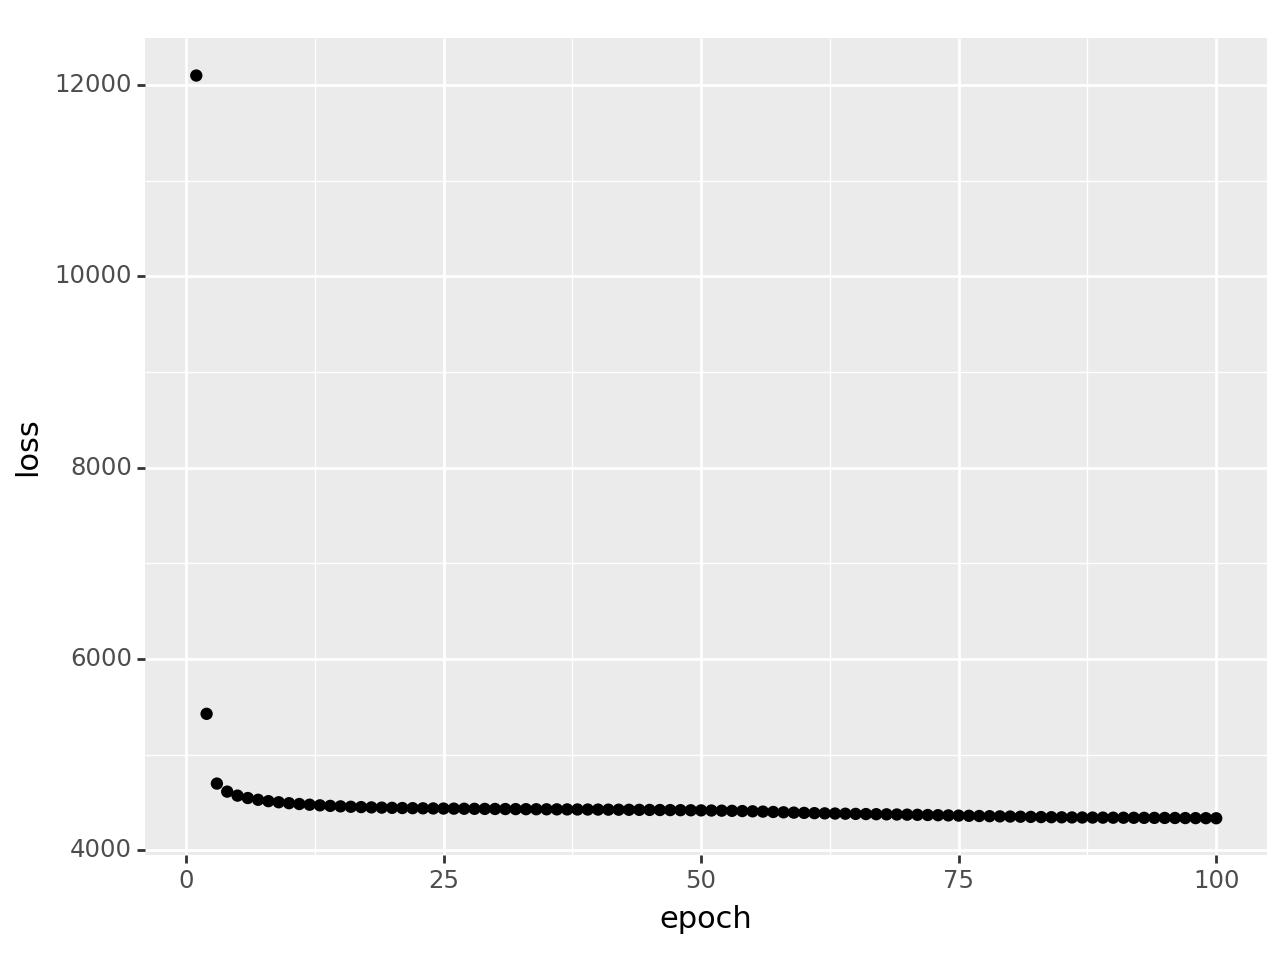

<Figure Size: (640 x 480)>

In [ ]:
# see what information has been logged during the training process
simple_nn.history.history.keys()

# plot the training loss over epochs
loss_df = pd.DataFrame(simple_nn.history.history['loss'])
loss_df.columns = ['loss']
loss_df = loss_df.assign(epoch = np.arange(1, 101))

(
    ggplot(loss_df, aes(x='epoch', y='loss')) +
    geom_point()
)

We can see that the training loss is decreasing almost linearly after each epoch. This suggests that we could in principle increase the number of epochs to achieve better predictions.

However, note that this is the loss computed at the end of each epoch on the **training set**. Thus, just looking at this loss can lead to **overfitting**. Increasing the number of epochs radically will lower the loss on the training set, but the loss on a set that the model has not been trained on could be much worse if the model is just reducing the loss on the training set by learning noise.

We can provide our validation dataset to keras in order to evaluate, at the end of each epoch, the loss on the validation dataset. This will allow us to detect if the model starts to overfit, for instance.

In [ ]:
simple_nn.fit(X_train, Y_train, epochs=100, batch_size = 50, validation_data= (X_validation, Y_validation))

Epoch 1/100
3023/3023 [==============================] - 9s 3ms/step - loss: 4334.4033 - val_loss: 4325.8286
Epoch 2/100
3023/3023 [==============================] - 7s 2ms/step - loss: 4333.1250 - val_loss: 4324.3750
Epoch 3/100
3023/3023 [==============================] - 9s 3ms/step - loss: 4331.4883 - val_loss: 4322.4517
Epoch 4/100
3023/3023 [==============================] - 9s 3ms/step - loss: 4329.0386 - val_loss: 4320.0425
Epoch 5/100
3023/3023 [==============================] - 9s 3ms/step - loss: 4325.6274 - val_loss: 4316.2329
Epoch 6/100
3023/3023 [==============================] - 8s 3ms/step - loss: 4322.4507 - val_loss: 4313.5840
Epoch 7/100
3023/3023 [==============================] - 8s 3ms/step - loss: 4320.0342 - val_loss: 4312.4385
Epoch 8/100
3023/3023 [==============================] - 7s 2ms/step - loss: 4318.1899 - val_loss: 4310.7427
Epoch 9/100
3023/3023 [==============================] - 9s 3ms/step - loss: 4316.7168 - val_loss: 4309.5337
Epoch 10/100
3023/3

KeyboardInterrupt: 

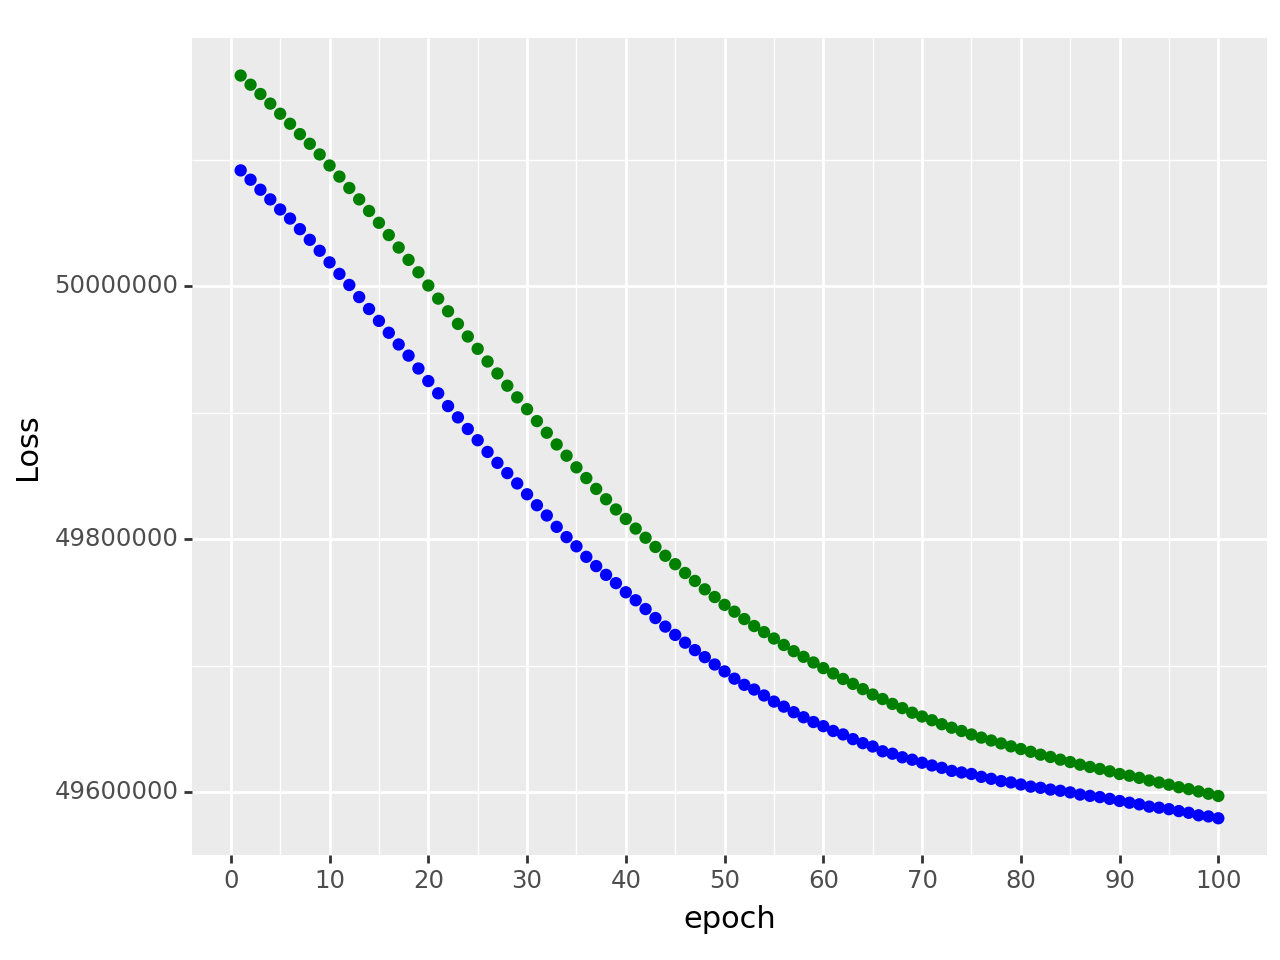

<Figure Size: (640 x 480)>

In [ ]:
# plot the training loss over epochs
def plot_loss(nn_model):
    loss_df = pd.DataFrame({
        'train_loss': nn_model.history.history['loss'],
        'val_loss': nn_model.history.history['val_loss']
    })
    loss_df = loss_df.assign(epoch = np.arange(1, 101))

    p = (
        ggplot(loss_df) +
        geom_point(aes(x='epoch', y='train_loss'), color='green') +
        geom_point(aes(x='epoch', y='val_loss'), color='blue') +
        scale_x_continuous(breaks = np.arange(0, 150, 10)) +
        ylab("Loss")
    )
    return p

plot_loss(simple_nn)

In [ ]:
# save the above simple nn fitted model to look at it later. We need to use the keras save command
# this command will save all the components of the model, in particular the architecture and the weights
# note: it will NOT save the training history. This needs to be saved separately.
simple_nn.save('../dataset/simple_nn_model')

print("Storing the fitting history of simple nn to disk")
with open('../dataset/simple_nn_history.json', 'w') as handle:
    json.dump(simple_nn.history.history, handle)

INFO:tensorflow:Assets written to: ../dataset/simple_nn_model\assets


INFO:tensorflow:Assets written to: ../dataset/simple_nn_model\assets


Storing the fitting history of simple nn to disk


In [ ]:
# we can load the above save model like this:
simple_nn = keras.models.load_model("../dataset/simple_nn_model")
simple_nn

# reload the fitting history like this
with open("../dataset/simple_nn_history.json", "r") as handle:
    simple_nn_history = json.load(handle)

In [ ]:
final_nn = Sequential()
final_nn.add(Dense(6, input_dim=X_train.shape[1], activation='relu'))
final_nn.add(Dense(1, activation='relu'))
final_nn.compile(loss='mean_squared_error', optimizer='adam')
final_nn.fit(X_train_validation, y_train_validation, epochs=100, batch_size = 100, verbose=0)
y_hat_test_nn = final_nn.predict(X_test)
y_hat_test_nn = np.where(y_hat_test_nn >= 0.5, 1, 0)
print("The f1 score of the nn model is {}".format(f1_score(Y_test, y_hat_test_nn)))

2362/2362 [==============================] - 4s 2ms/step


ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [ ]:
oversized_nn = Sequential()
oversized_nn.add(Dense(6, input_dim=X_train.shape[1], activation='relu'))
oversized_nn.add(Dense(4, activation='relu'))
oversized_nn.add(Dense(2, activation='relu'))
oversized_nn.add(Dense(1, activation='sigmoid'))
oversized_nn.compile(loss="mean_squared_error", optimizer="adam")
oversized_nn.fit(X_train, Y_train, epochs=150, batch_size = 20, validation_data=(X_validation, Y_validation))

Epoch 1/150
15115/15115 [==============================] - 47s 3ms/step - loss: 279356896.0000 - val_loss: 279061216.0000
Epoch 2/150
15115/15115 [==============================] - 46s 3ms/step - loss: 279355968.0000 - val_loss: 279061216.0000
Epoch 3/150
15115/15115 [==============================] - 46s 3ms/step - loss: 279356160.0000 - val_loss: 279061216.0000
Epoch 4/150
15115/15115 [==============================] - 47s 3ms/step - loss: 279356000.0000 - val_loss: 279061216.0000
Epoch 5/150
15115/15115 [==============================] - 47s 3ms/step - loss: 279354912.0000 - val_loss: 279061216.0000
Epoch 6/150
15115/15115 [==============================] - 47s 3ms/step - loss: 279355712.0000 - val_loss: 279061216.0000
Epoch 7/150
15115/15115 [==============================] - 48s 3ms/step - loss: 279355936.0000 - val_loss: 279061216.0000
Epoch 8/150
 9951/15115 [==================>...........] - ETA: 15s - loss: 278240416.0000

In [ ]:
plot_loss(oversized_nn)

Hyperparameter Tunning

In [ ]:
# from keras.wrappers.scikit_learn import KerasClassifier
from scikeras.wrappers import KerasClassifier

In [ ]:
# function that creates the model
# note that we pass the number of neurons as a parameter to the network
def create_model(neurons=1):
    nn_model = Sequential()
    nn_model.add(Dense(neurons, input_dim=X_train.shape[1], activation="relu"))
    nn_model.add(Dense(1, activation='relu'))
    nn_model.compile(loss='mean_squared_error', optimizer='adam')
    return nn_model

seed = 1234
np.random.seed(seed)

# turn the keras model into a sklearn compatible model
# note that the neurons parameter needs to be specified in the interface of KerasClassifier
model = KerasClassifier(build_fn=create_model, verbose=0, neurons=1)

In [ ]:
# define the grid search parameters
batch_size = [10, 20]
epochs = [100, 150]
neurons = [10, 20, 30]
params_grid = dict(batch_size=batch_size, epochs=epochs, neurons=neurons)

In [ ]:
params_grid

In [ ]:
print("The best parameter combination is: {} with score: {}".format(grid_search_nn.best_params_, grid_search_nn.best_score_))

We now train a model with the best parameters found on train and validation, together:

In [ ]:
best_model = create_model(20)
best_model.fit(X_train_validation, y_train_validation, epochs=100, batch_size=10, verbose=0)

We can then evaluate the model so trained on the test set:

In [ ]:
y_hat_test = best_model.predict(X_test)
y_hat_test = np.where(y_hat_test >= 0.5, 1, 0)
f1_score(Y_test, y_hat_test)

This is worse than the results obtained above, but note that the hypertuning has identified as the best number of nodes (20) the number of nodes we used above.

The underperformance here is most likely due to the grid search being too small, for instance we saw above that the model with 20 neurons does better when the epochs are on the small side (20-60).
Here we only have 100 and 150 epochs in the grid search.

We would then be able to improve the results if we had a finer grid using the insights from the quick test above to zone in on the parameters that are more likely to yield good performance (e.g., epochs < 100).